# Task 1

BY:VAISHALI DHOTE

# Stock Prediction

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

In [36]:
df = pd.read_csv(
    "https://query1.finance.yahoo.com/v7/finance/download/AAPL?period1=1514764800&period2=1620768000&interval=1d&events=history&includeAdjustedClose=true"
)

df = df[["Date", "Close"]]

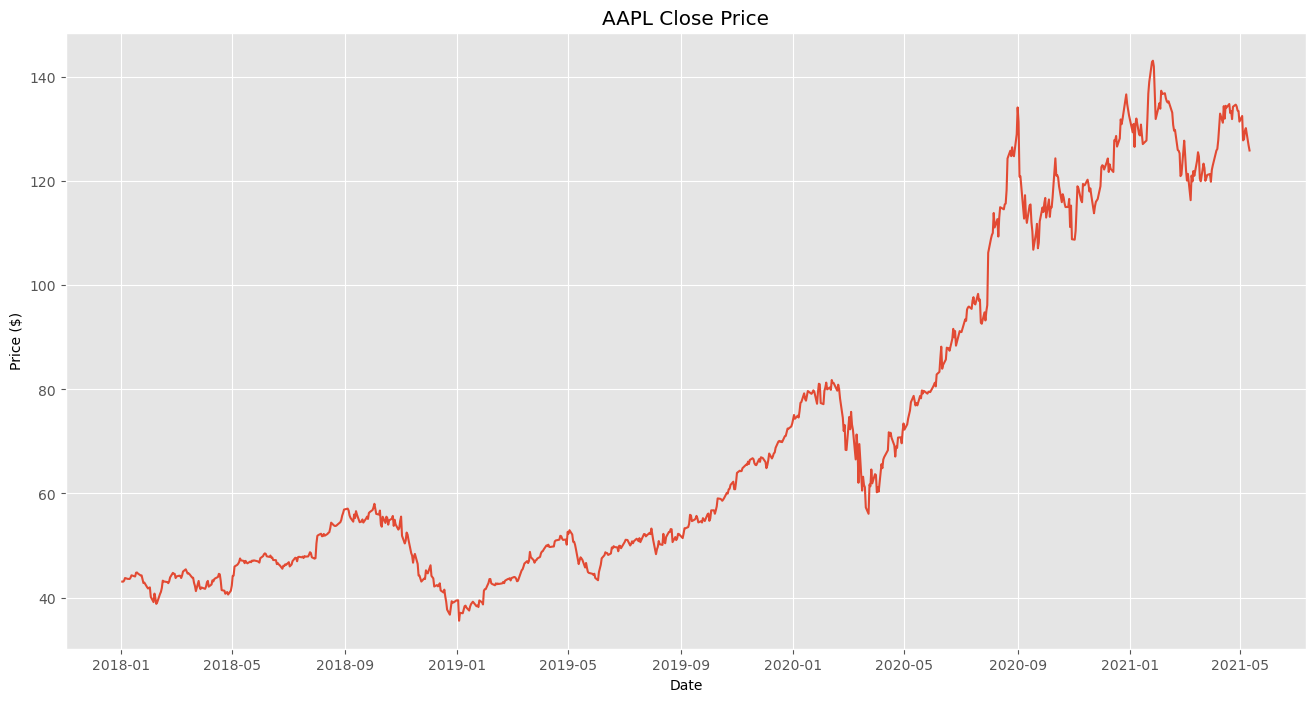

In [26]:
df["Date"] = pd.to_datetime(df["Date"])
df.set_index("Date", inplace=True)
plt.figure(figsize=(16, 8))
plt.plot(df["Close"])
plt.title("AAPL Close Price")
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.show()

In [27]:
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(df.values)

In [28]:
train_size = int(len(data) * 0.7)
train_data = data[:train_size, :]
test_data = data[train_size:, :]

In [29]:
def create_dataset(data, look_back=1):
    X, Y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i : i + look_back, 0])
        Y.append(data[i + look_back, 0])
    return np.array(X), np.array(Y)

In [30]:
look_back = 60
train_X, train_Y = create_dataset(train_data, look_back)
test_X, test_Y = create_dataset(test_data, look_back)

train_X = np.reshape(train_X, (train_X.shape[0], train_X.shape[1], 1))
test_X = np.reshape(test_X, (test_X.shape[0], test_X.shape[1], 1))

In [31]:
model = Sequential()
model.add(LSTM(50, input_shape=(look_back, 1)))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss="mean_squared_error", optimizer="adam")

In [32]:
model.fit(train_X, train_Y, epochs=100, batch_size=32, verbose=2)



Epoch 1/100
17/17 - 5s - loss: 0.0040 - 5s/epoch - 302ms/step
Epoch 2/100
17/17 - 1s - loss: 0.0013 - 502ms/epoch - 30ms/step
Epoch 3/100
17/17 - 0s - loss: 8.7927e-04 - 492ms/epoch - 29ms/step
Epoch 4/100
17/17 - 1s - loss: 6.7902e-04 - 512ms/epoch - 30ms/step
Epoch 5/100
17/17 - 1s - loss: 7.4676e-04 - 513ms/epoch - 30ms/step
Epoch 6/100
17/17 - 0s - loss: 6.9002e-04 - 449ms/epoch - 26ms/step
Epoch 7/100
17/17 - 0s - loss: 6.2730e-04 - 449ms/epoch - 26ms/step
Epoch 8/100
17/17 - 0s - loss: 7.4963e-04 - 458ms/epoch - 27ms/step
Epoch 9/100
17/17 - 0s - loss: 6.3245e-04 - 474ms/epoch - 28ms/step
Epoch 10/100
17/17 - 0s - loss: 5.7210e-04 - 444ms/epoch - 26ms/step
Epoch 11/100
17/17 - 0s - loss: 5.8313e-04 - 468ms/epoch - 28ms/step
Epoch 12/100
17/17 - 0s - loss: 5.7193e-04 - 454ms/epoch - 27ms/step
Epoch 13/100
17/17 - 0s - loss: 5.3624e-04 - 456ms/epoch - 27ms/step
Epoch 14/100
17/17 - 1s - loss: 4.7657e-04 - 573ms/epoch - 34ms/step
Epoch 15/100
17/17 - 1s - loss: 6.1478e-04 - 570ms/ep

In [33]:
predictions = model.predict(test_X)
predictions = scaler.inverse_transform(predictions)

7/7 [==============================] - 1s 13ms/step


ValueError: x and y must have same first dimension, but have shapes (194,) and (254,)

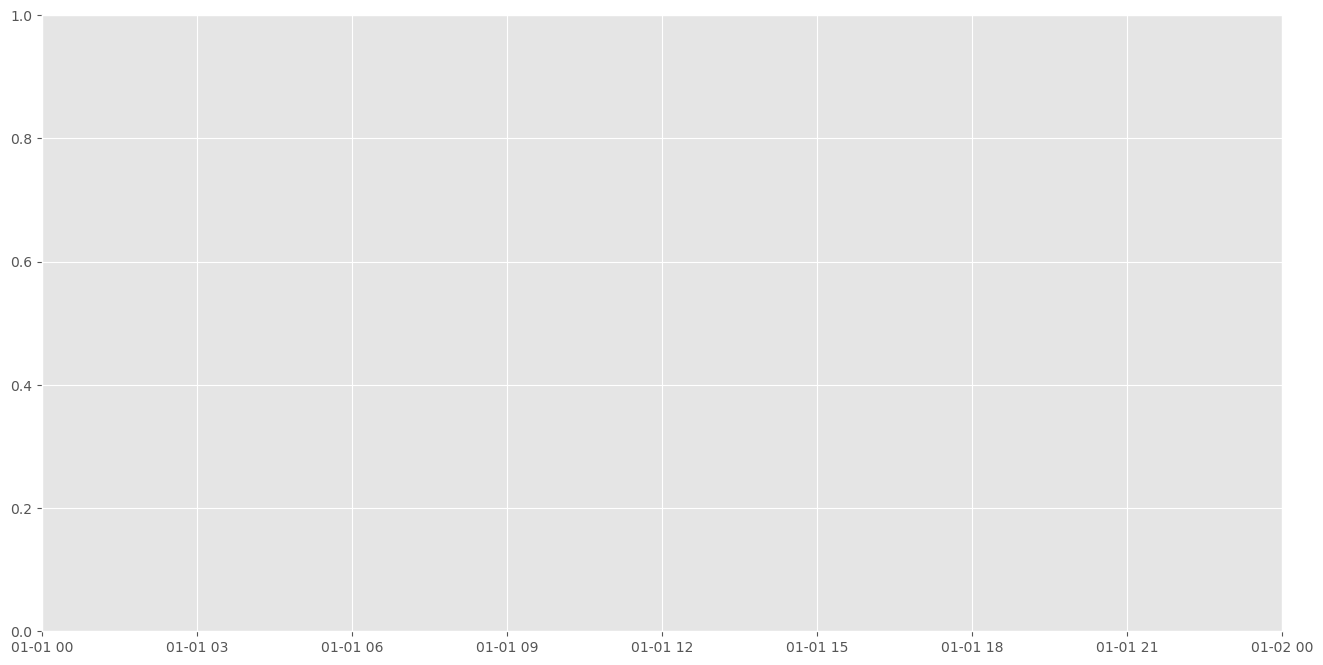

In [34]:
plt.figure(figsize=(16, 8))
plt.plot(df.index[train_size + look_back :], test_data[:, 0], label="Actual")
plt.plot(df.index[train_size + look_back :], predictions[:, 0], label="Predicted")
plt.title("AAPL Close Price Prediction")
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.legend()
plt.show()